# GLOBAL_ANALYSIS_FORECAST_PHY_001_024

The product is organized in 5 datasets:

| dataset | time | space | mode | name of file |
| :--- | :--- | :--- | :--- | :--- |
| global-analysis-forecast-phy-001-024 | daily | 3D | mean | mercatorpsy4v3r1_gl12_mean_\\${date1}_R \\${date2}.nc |
| global-analysis-forecast-phy-001-024-hourly-t-u-v-ssh | hourly | surface | mean | mercatorpsy4v3r1_gl12_hrly_\\${date1}_R\\${date2}.nc |
| global-analysis-forecast-phy-001-024-monthly | monthly | 3D | mean | mercatorpsy4v3r1_gl12_mean_\\${YYYYMM}.nc |
| global-analysis-forecast-phy-001-024--hourly-merged-uv | hourly | surface | instantaneous, merged | SMOC_\\${date1}_R\\${date2}.nc |
| global-analysis-forecast-phy-001-024-statics | static | - | - | GLO-MFC_001_024_\\${field}.nc |


| dataset | variables |
| :--- | :--- | 
| global-analysis-forecast-phy-001-024 | thetao, so, uo, vo, zos, mlotst, bottomT, siconc, sithick, usi, vsi |
| global-analysis-forecast-phy-001-024-hourly-t-u-v-ssh | thetao, uo, vo, zos |
| global-analysis-forecast-phy-001-024-monthly | thetao, so, uo, vo, zos, mlotst, bottomT, siconc, sithick, usi, vsi |
| global-analysis-forecast-phy-001-024--hourly-merged-uv | uo, vo, vsdx, vsdy, utide, vtide, utotal, vtotal |
| global-analysis-forecast-phy-001-024-statics | e1t, e2t, e3t, mask, deptho, deptho_lev, mdt |

| variable | explanation  | unit |
| :--- | :--- | :--- | 
| thetao | Potential temperature | °C |
| so | Salinity | psu |
| uo | Eastward ocean current velocity | m/s |
| vo | Northward ocean current velocity | m/s |
| zos | Sea surface height | m |
| mlotst | Mixed layer thickness | m |
| bottomT | Sea floor potential temperature | °C |
| siconc | Sea ice concentration | 1 |
| sithick | Sea ice thickness | m |
| usi | Eastward sea ice velocity | m/s |
| vsi | Northward sea ice velocity | m/s |
| vsdx (ustokes) | Current from waves (zonal velocity) | m/s |
| vsdy (vstokes) | Current from waves (meridional velocity) | m/s |
| utide | Tide currents (zonal velocity) | m/s |
| vtide | Tide currents (meridional velocity) | m/s |
| utotal | Total current (zonal velocity) | m/s |
| vtotal | Total current (meridional velocity) | m/s |
| e1t | Cell dimension along X axis | m |
| e2t | Cell dimension along Y axis | m |
| e3t | Cell dimension along Z axis | m |
| mask | Land-sea mask | 1 = sea; 0 = land |
| deptho | Bathymetry | m |
| deptho_lev | Model level number at sea floor | - |
| mdt | Mean dynamic topography | m |


## Preparation

In [1]:
import os
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

In [11]:
path = os.path.join('..','..','..','..','data','CMEMS','GLOBAL_ANALYSIS_FORECAST_PHY_001_024')
file = os.path.join(path,'mercatorpsy4v3r1_gl12_mean_20201202_R20201216.nc')
#file = os.path.join(path,'SMOC_20201202_R20201203.nc')

file

'../../../../data/CMEMS/GLOBAL_ANALYSIS_FORECAST_PHY_001_024/mercatorpsy4v3r1_gl12_mean_20201202_R20201216.nc'

In [12]:
def hide_axes(ax):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

## Metadata 

In [13]:
ds = nc.Dataset(file)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    title: daily mean fields from Global Ocean Physics Analysis and Forecast updated Daily
    easting: longitude
    northing: latitude
    history: 2020/12/13 21:12:50 MERCATOR OCEAN Netcdf creation
    source: MERCATOR PSY4V3R1
    institution: MERCATOR OCEAN
    references: http://www.mercator-ocean.fr
    comment: CMEMS product
    Conventions: CF-1.4
    domain_name: GL12
    field_type: mean
    field_date: 2020-12-02 00:00:00
    field_julian_date: 25903.0
    julian_day_unit: days since 1950-01-01 00:00:00
    forecast_range: 0-day_forecast
    forecast_type: hindcast
    bulletin_date: 2020-12-16 00:00:00
    bulletin_type: operational
    longitude_min: -180.0
    longitude_max: 179.91667
    latitude_min: -80.0
    latitude_max: 90.0
    z_min: 0.494025
    z_max: 5727.917
    dimensions(sizes): longitude(4320), latitude(2041), depth(50), time(1)
    variables(dimensions): 

In [14]:
print(ds.dimensions)

OrderedDict([('longitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 4320), ('latitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 2041), ('depth', <class 'netCDF4._netCDF4.Dimension'>: name = 'depth', size = 50), ('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1)])


In [15]:
# Variables
for var in ds.variables:
    print(var)

longitude
latitude
depth
time
mlotst
zos
bottomT
sithick
siconc
usi
vsi
thetao
so
uo
vo


In [16]:
for var in ds.variables.values():
    print(var)
    print('---------------------------------------')

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    valid_min: -180.0
    valid_max: 179.91667
    step: 0.08332825
    units: degrees_east
    unit_long: Degrees East
    long_name: Longitude
    standard_name: longitude
    axis: X
unlimited dimensions: 
current shape = (4320,)
filling on, default _FillValue of 9.969209968386869e+36 used
---------------------------------------
<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    valid_min: -80.0
    valid_max: 90.0
    step: 0.08333588
    units: degrees_north
    unit_long: Degrees North
    long_name: Latitude
    standard_name: latitude
    axis: Y
unlimited dimensions: 
current shape = (2041,)
filling on, default _FillValue of 9.969209968386869e+36 used
---------------------------------------
<class 'netCDF4._netCDF4.Variable'>
float32 depth(depth)
    valid_min: 0.494025
    valid_max: 5727.917
    units: m
    positive: down
    unit_long: Meters
    long_name: Depth
    standard_name: depth
    a

## Data

In [17]:
# Dictionaries for plot labelling
# psu - practical salinity unit, 1 psu = 1 g salt / 1 kg sea water

param_dict = {
    'thetao': {'variable': 'Potential temperature', 'unit': '°C', 'dim': 4},
    'so': {'variable': 'Salinity', 'unit': 'psu', 'dim': 4},
    'uo': {'variable': 'Eastward ocean current velocity', 'unit': 'm/s', 'dim': 4},
    'vo': {'variable': 'Northward ocean current velocity', 'unit': 'm/s', 'dim': 4},
    'zos':{'variable': 'Sea surface height', 'unit': 'm', 'dim': 3},
    'mlotst': {'variable': 'Mixed layer thickness', 'unit': 'm', 'dim': 3},
    'bottomT': {'variable': 'Sea floor potential temperature', 'unit': '°C', 'dim': 3},
    'siconc': {'variable': 'Sea ice concentration', 'unit': '1', 'dim': 3},
    'sithick': {'variable': 'Sea ice thickness', 'unit': 'm', 'dim': 3},
    'usi': {'variable': 'Eastward sea ice velocity', 'unit': 'm/s', 'dim': 3},
    'vsi': {'variable': 'Northward sea ice velocity', 'unit': 'm/s', 'dim': 3},
    'vsdx': {'variable': 'Eastward wave-induced velocity ', 'unit': 'm/s', 'dim': 4},
    'vsdy': {'variable': 'Northward wave-induced velocity ', 'unit': 'm/s', 'dim': 4},
    'utide': {'variable': 'Eastward tide-induced velocity', 'unit': 'm/s', 'dim': 4},
    'vtide': {'variable': 'Northward tide-induced velocity', 'unit': 'm/s', 'dim': 4},
    'utotal': {'variable': 'Eastward total velocity', 'unit': 'm/s', 'dim': 4},
    'vtotal': {'variable': 'Northward total velocity', 'unit': 'm/s', 'dim': 4},
    'e1t': {'variable': 'Cell dimension along X axis', 'unit': 'm', 'dim': 3},
    'e2t': {'variable': 'Cell dimension along Y axis', 'unit': 'm', 'dim': 3},
    'e3t': {'variable': 'Cell dimension along Z axis', 'unit': 'm', 'dim': 3},
    'mask': {'variable': 'Land-sea mask', 'unit': '1 = sea ; 0 = land', 'dim': 3},
    'deptho': {'variable': 'Bathymetry', 'unit': 'm', 'dim': 3},
    'deptho_lev': {'variable': 'Model level number at sea floor', 'unit': '-', 'dim': 3},
    'mdt': {'variable': 'Mean dynamic topography', 'unit': 'm', 'dim': 3},
}


In [18]:
variables = list(ds.variables.keys())[4:] # skip [long, lat, depth, time]
variables

['mlotst',
 'zos',
 'bottomT',
 'sithick',
 'siconc',
 'usi',
 'vsi',
 'thetao',
 'so',
 'uo',
 'vo']

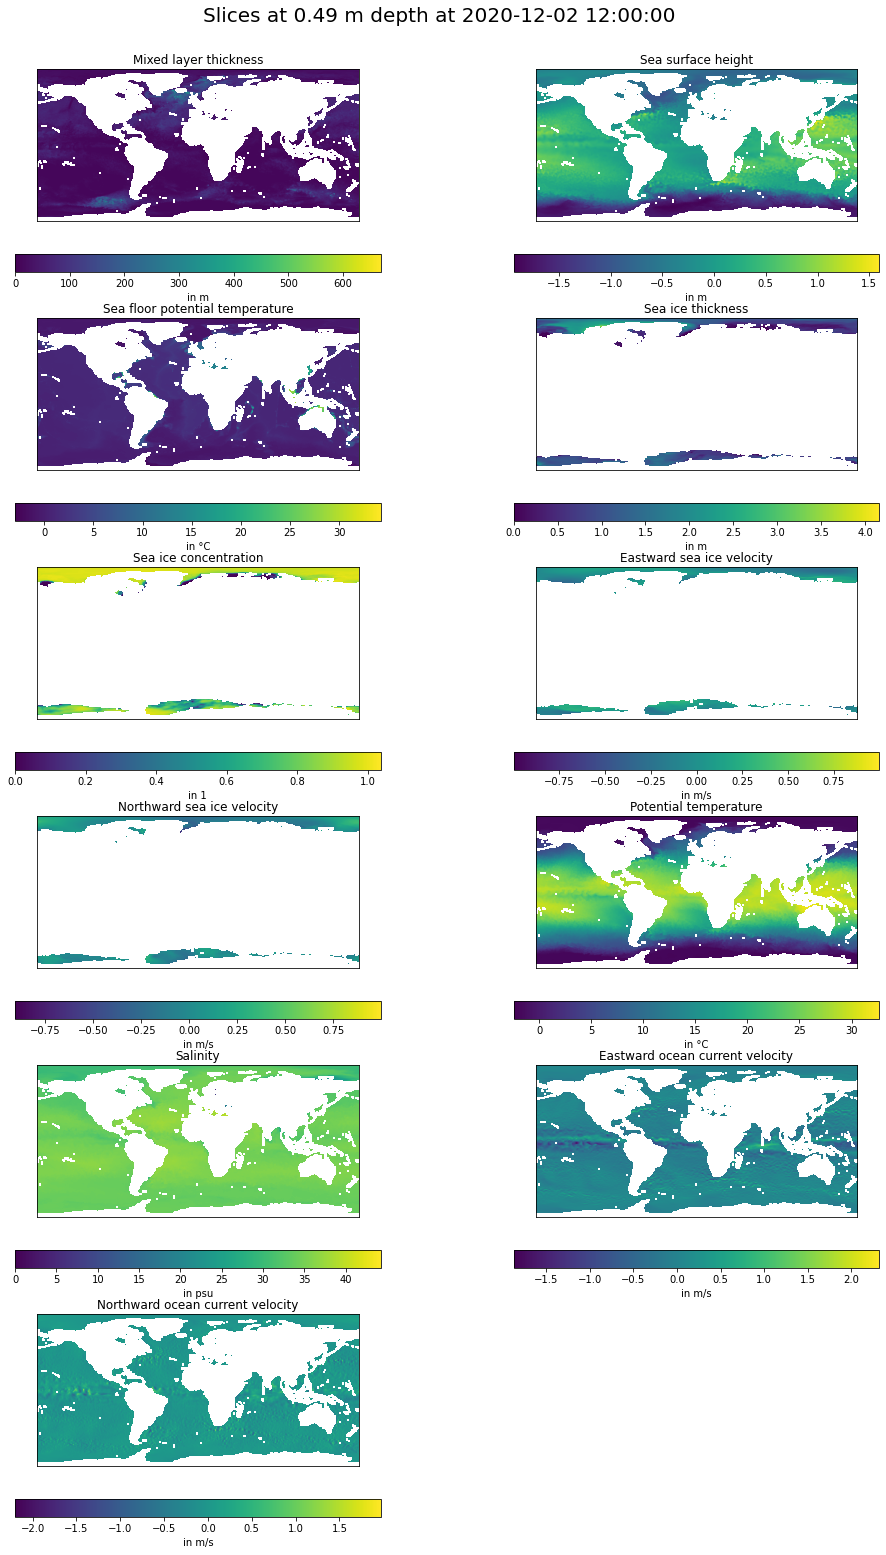

In [20]:
depth_slice = 0
time_slice = 0
# Shape of subplots 
ncol = 2
nrow = int(np.ceil(len(variables)/ncol))

# figsize may need to be adapted for optimal display 
fig, ax_list = plt.subplots(nrow, ncol, figsize=(14,22))
ax_list = ax_list.ravel()
im_list = []
fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle('Slices at {:.2f} m depth at {}'.format(ds['depth'][depth_slice], datetime.strptime('1950-01-01 00:00:00', '%Y-%m-%d %H:%M:%S') + timedelta(hours=ds['time'][time_slice].data.item())), fontsize=20)
for i in range(0,nrow*ncol-len(variables)):
    fig.delaxes(ax_list[-1])
    ax_list = ax_list[:-1] 

for idx, ax in enumerate(ax_list):
    # Check dimension of nc
    if param_dict[variables[idx]]['dim'] == 3:
        im = ax.imshow(np.flipud(ds[variables[idx]][time_slice, :, :]), extent=[0,4320,0,2041])
    elif param_dict[variables[idx]]['dim'] == 4:
        im = ax.imshow(np.flipud(ds[variables[idx]][time_slice, depth_slice, :, :]), extent=[0,4320,0,2041])
    im_list.append(im)
    ax.title.set_text(param_dict[variables[idx]]['variable'])
    hide_axes(ax)  
    fig.colorbar(im, ax=ax, orientation='horizontal', label='in {}'.format(param_dict[variables[idx]]['unit']), shrink=0.8);